In [76]:
from datasets import load_dataset_builder, load_dataset
import re
import matplotlib.pyplot as plt

In [13]:
tifu = load_dataset("reddit_tifu", 'long')

Generating train split: 100%|██████████| 42139/42139 [00:03<00:00, 10680.48 examples/s]


(array([78.,  0.,  0., ...,  0.,  0.,  1.]),
 array([0.00000000e+00, 7.43655638e-02, 1.48731128e-01, ...,
        4.62851269e+02, 4.62925634e+02, 4.63000000e+02]),
 <BarContainer object of 6226 artists>)

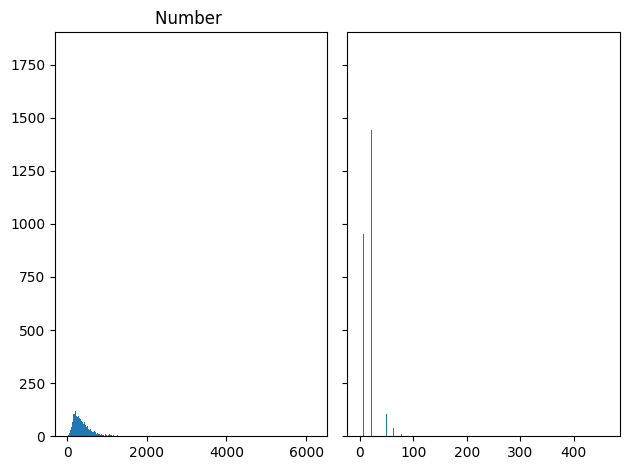

In [78]:
# tifu = tifu.add_column
doc_tok_cnt = [len(re.findall(r'\w+', sentence)) for sentence in tifu['train']['documents']]
summ_tok_cnt = [len(re.findall(r'\w+', sentence)) for sentence in tifu['train']['tldr']]

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
x_lim = max(doc_tok_cnt) if doc_tok_cnt > summ_tok_cnt else summ_tok_cnt
# axs[0].hist(doc_tok_cnt, bins=x_lim)
# axs[0].set_title('Number ')
# axs[1].hist(summ_tok_cnt, bins=x_lim)

In [26]:
# tifu.train_test_split(test_size=0.1)
dataset = tifu['train'].train_test_split(test_size=0.2)
dataset

DatasetDict({
    train: Dataset({
        features: ['ups', 'num_comments', 'upvote_ratio', 'score', 'documents', 'tldr', 'title'],
        num_rows: 33711
    })
    test: Dataset({
        features: ['ups', 'num_comments', 'upvote_ratio', 'score', 'documents', 'tldr', 'title'],
        num_rows: 8428
    })
})

In [59]:
def show_samples(dataset, num_samples=3, seed=42):
    sample = dataset["train"].shuffle(seed=seed).select(range(num_samples))
    for example in sample:
        title, doc, summ = example['title'], example['documents'], example['tldr']
        print(f">> title: {title}")
        print(">> documents: {0}...".format(doc[:doc.find('\n')]))
        print(f">> summary: {summ}\n")

show_samples(dataset, 3)

>> title: forgetting how powerful the smell of cum is.
>> documents: so i usually masturbate with a t-shirt or a pajama. i fap into them until they're crusty and start scratching my dick when i masturbate with them....
>> summary: the stench of my cum-crusted underwear invited hordes of ants to take a piece of it back to their beloved queen. freak out ensued.

>> title: bringing a copy of the anarchy cookbook to school
>> documents: this happened just a few hours ago during school so that's always a bonus. so i ordered a copy of the anarchy cookbook last week and it came in on saturday. i only skimmed through not really reading the glut of the book but i told my friend about it and he was ecstatic to see it, let's call him ricardo. so my school has about 40 kids per graduating class at my school and there's not enough lunch space for the 2 classes that do have class at the same time so one class it's in a classroom. come lunch time me and ricardo head to a class room and there is no te

In [43]:
dataset['train'][3]['documents']

'happened about 20 minutes ago...\nso i need a textbook for an online college course, and the cheapest option i found was to rent it on my kindle. my dad offers to pay for it, so i pull up amazon and have him enter his credit card info on my laptop. \n\nafter ordering the book, it was taking a while to show up on my kindle. thinking something had gone wrong, i decided to pull up my order history, with my dear old conservative father watching. there, in all its pink, fleshy goodness, was the sasha grey pocket pussy i forgot i ordered a few months back. in my panicked clicking frenzy to get this faux fur burger off my screen, i accidentally expanded the picture. yep, my dad and i got the full 17\'\' hd experience. \n\nturning the laptop away, i finally got the window closed. after an awkward second of silence, i finally suggest seeing if anything has popped up on my kindle yet. he just sort of mutters "let me know if everything works out..." and walks away. i am now in a state of cringe 